In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('accident.csv')


/var/folders/v7/fl37bh_11xn4dz8nn__9q52m0000gn/T/ipykernel_19216/2300915779.py:1: DtypeWarning: Columns (0,2,35) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('accident.csv')


In [21]:
df['date']= pd.to_datetime(df['date'], format="%d/%m/%Y")

In [22]:
# slice first and second string from time column
df['Hour'] = df['time'].str[0:2]
# convert new column to numeric datetype
df['Hour'] = pd.to_numeric(df['Hour'])
# drop null values in our new column
df = df.dropna(subset=['Hour'])
# cast to integer values
df['Hour'] = df['Hour'].astype('int')

In [23]:
# define a function that turns the hours into daytime groups
def when_was_it(hour):
    if hour >= 5 and hour < 10:
        return "morning rush (5-10)"
    elif hour >= 10 and hour < 15:
        return "office hours (10-15)"
    elif hour >= 15 and hour < 19:
        return "afternoon rush (15-19)"
    elif hour >= 19 and hour < 23:
        return "evening (19-23)"
    else:
        return "night (23-5)"

In [26]:
# apply thus function to our temporary hour column
df['Daytime'] = df['Hour'].apply(when_was_it)

In [27]:
weekday_counts = pd.DataFrame(df.set_index('date').resample('1d')['accident_index'].size().reset_index())
weekday_counts.columns = ['Date', 'Count']
#weekday_counts

weekday = weekday_counts['Date'].dt.day_name()
#weekday

weekday_averages = pd.DataFrame(weekday_counts.groupby(weekday)['Count'].mean().reset_index())
weekday_averages.columns = ['Weekday', 'Average_Accidents']
weekday_averages.set_index('Weekday', inplace=True)
weekday_averages

,Average_Accidents
Weekday,
Friday,524.760200
Monday,453.759167
Saturday,429.460833
Sunday,352.233333
Thursday,478.625000
Tuesday,470.120000
Wednesday,474.516667


In [29]:
test = pd.DataFrame(df.set_index('date').resample('M').size())
test.columns = ['Accidents']
test

,Accidents
date,
1999-01-31,19457
1999-02-28,16432
1999-03-31,18870
1999-04-30,18483
1999-05-31,18620
...,...
2021-08-31,8726
2021-09-30,9871
2021-10-31,9711


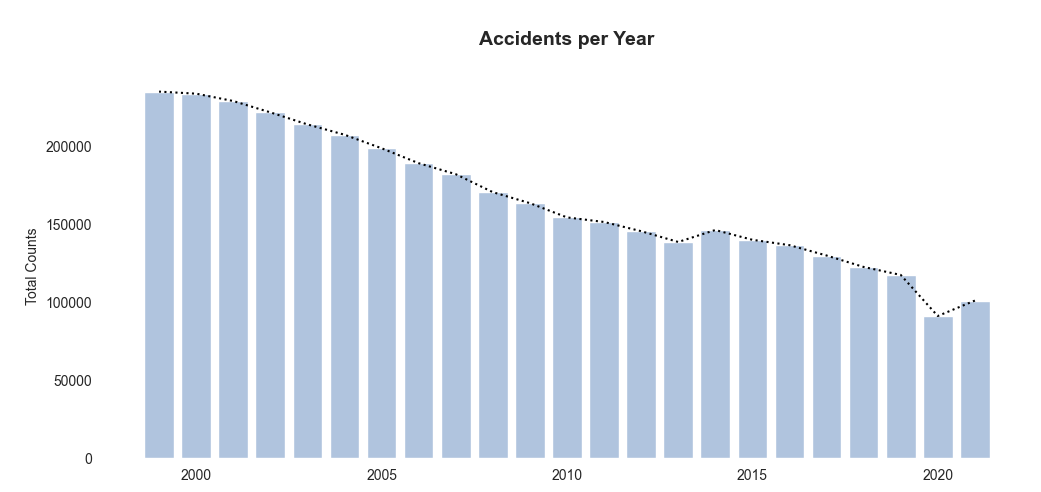

In [40]:

yearly_count = df['date'].dt.year.value_counts().sort_index(ascending=False)

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(12,5))

# plot
ax.bar(yearly_count.index, yearly_count.values, color='lightsteelblue')
ax.plot(yearly_count, linestyle=':', color='black')
ax.set_title('\nAccidents per Year\n', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Counts')

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);

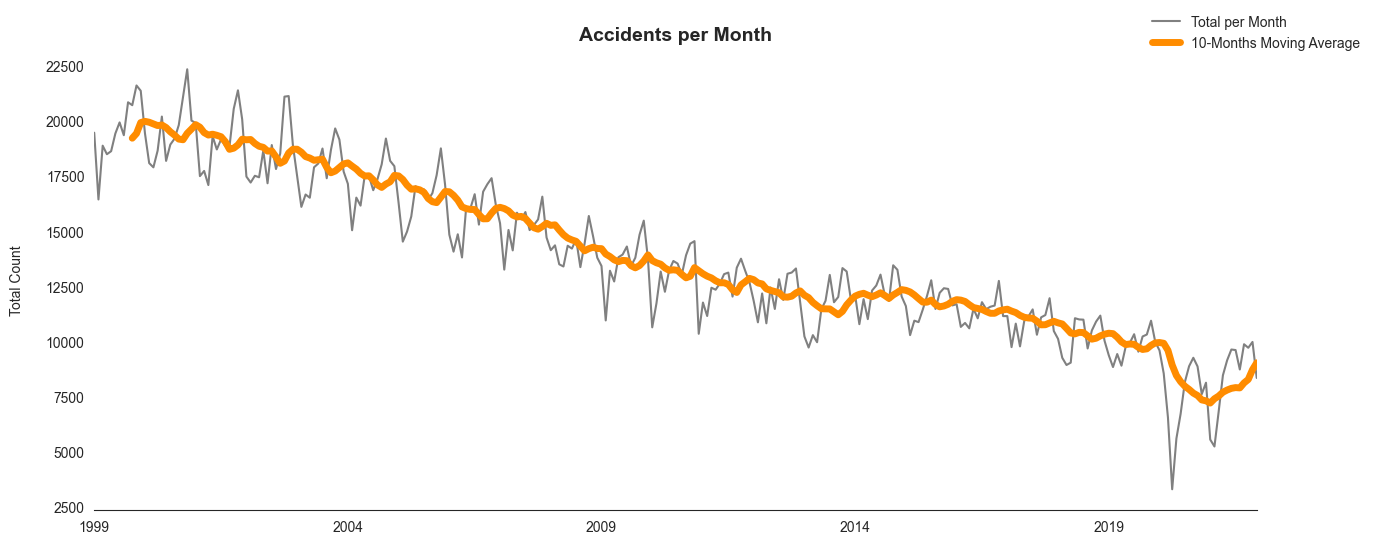

In [30]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(15,6))

# plot
df.set_index('date').resample('M').size().plot(label='Total per Month', color='grey', ax=ax)
df.set_index('date').resample('M').size().rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('Accidents per Month', fontsize=14, fontweight='bold')
ax.set(ylabel='Total Count\n', xlabel='')
ax.legend(bbox_to_anchor=(1.1, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=False);


In [31]:
weekday = df['date'].dt.day_name()
year    = df['date'].dt.year

accident_table = df.groupby([year, weekday]).size()
accident_table = accident_table.rename_axis(['Year', 'Weekday'])\
                               .unstack('Weekday')\
                               #.reindex(columns=days)
accident_table

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
1999,39268,33987,32077,25678,35365,34411,34262
2000,39104,33675,32613,25942,34953,33902,33540
2001,37539,33074,31734,25190,34304,33179,33994
2002,37744,32070,30261,24821,32723,31787,32345
2003,35872,31139,29295,24329,31400,30643,31352
2004,34536,28954,28299,22849,31555,30511,30706
2005,32738,27812,26945,21910,29738,29219,30373
2006,31994,26144,25980,21443,28150,27342,28108
2007,29262,26251,24686,20386,27303,26927,27300


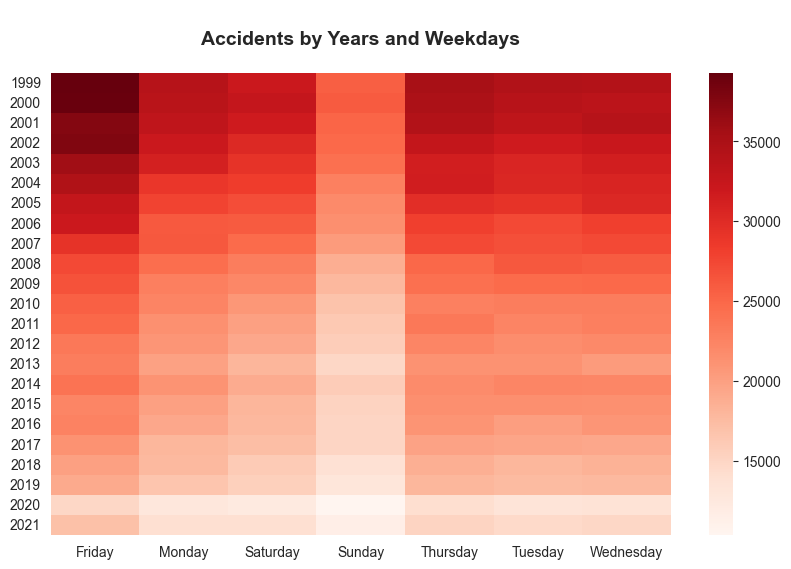

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(accident_table, cmap='Reds')
plt.title('\nAccidents by Years and Weekdays\n', fontsize=14, fontweight='bold')
plt.xlabel('')
plt.ylabel('');

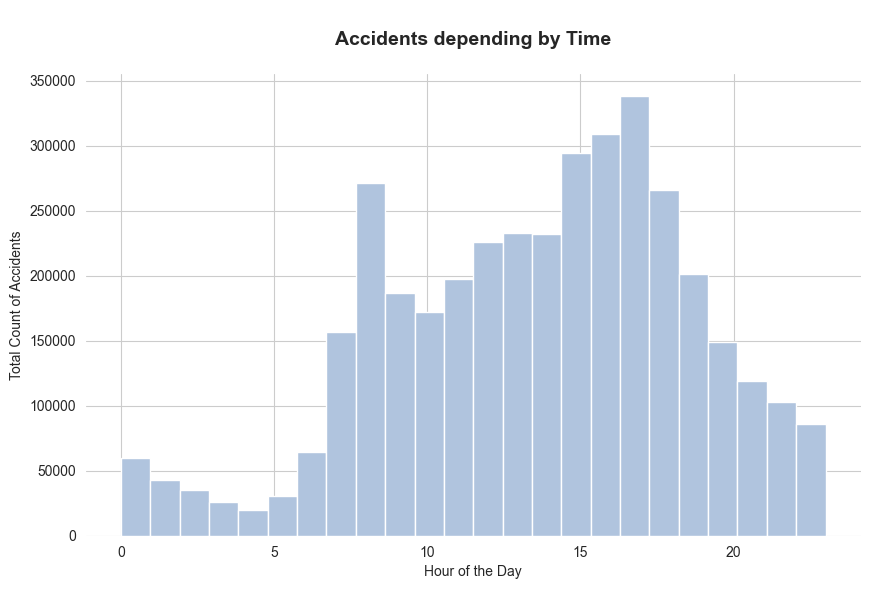

In [41]:
# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(10,6))

# plot
df.Hour.hist(bins=24, ax=ax, color='lightsteelblue')
ax.set_title('\nAccidents depending by Time\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Hour of the Day', ylabel='Total Count of Accidents')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);


In [2]:
df.accident_severity.value_counts()

NameError: name 'df' is not defined

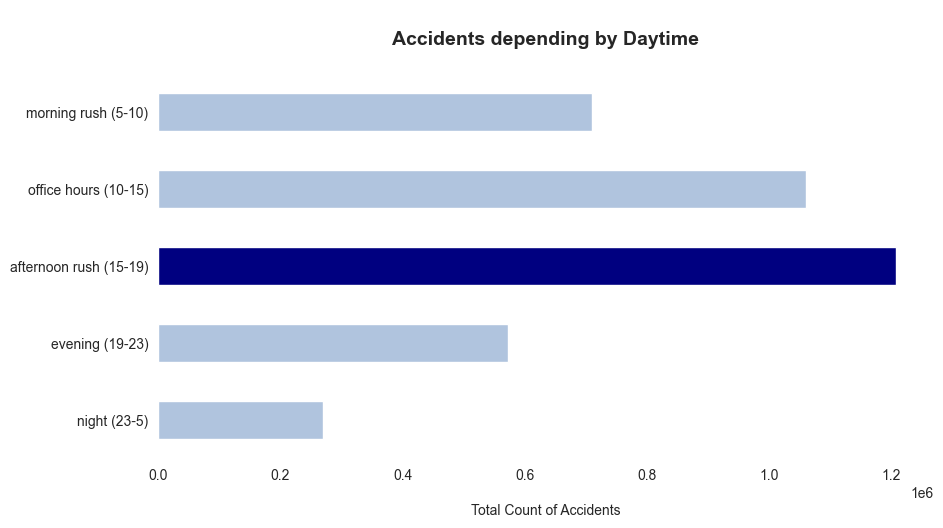

In [ ]:
# prepare dataframe
order = ['night (23-5)', 'evening (19-23)', 'afternoon rush (15-19)', 'office hours (10-15)', 'morning rush (5-10)']
df_sub = df.groupby('Daytime').size().reindex(order)

# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))
colors = ['lightsteelblue', 'lightsteelblue', 'navy', 'lightsteelblue', 'lightsteelblue']

# plot
df_sub.plot(kind='barh', ax=ax, color=colors)
ax.set_title('\nAccidents depending by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='\nTotal Count of Accidents', ylabel='')

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

In [4]:
# assign the data
fatal   = df.accident_severity.value_counts()[1]
serious = df.accident_severity.value_counts()[2]
slight  = df.accident_severity.value_counts()[3]

names = ['Fatal Accidents','Serious Accidents', 'Slight Accidents']
size  = [fatal, serious, slight]
#explode = (0.2, 0, 0)

# create a pie chart
plt.pie(x=size, labels=names, colors=['red', 'darkorange', 'silver'], 
        autopct='%1.2f%%', pctdistance=0.6, textprops=dict(fontweight='bold'),
        wedgeprops={'linewidth':7, 'edgecolor':'white'})

# create circle for the center of the plot to make the pie look like a donut
my_circle = plt.Circle((0,0), 0.6, color='white')

# plot the donut chart
fig = plt.gcf()
fig.set_size_inches(8,8)
fig.gca().add_artist(my_circle)
plt.title('\nAccident Severity: Share in % (1999-2021)', fontsize=14, fontweight='bold')
plt.show()



NameError: name 'df' is not defined

NameError: name 'counts_share' is not defined

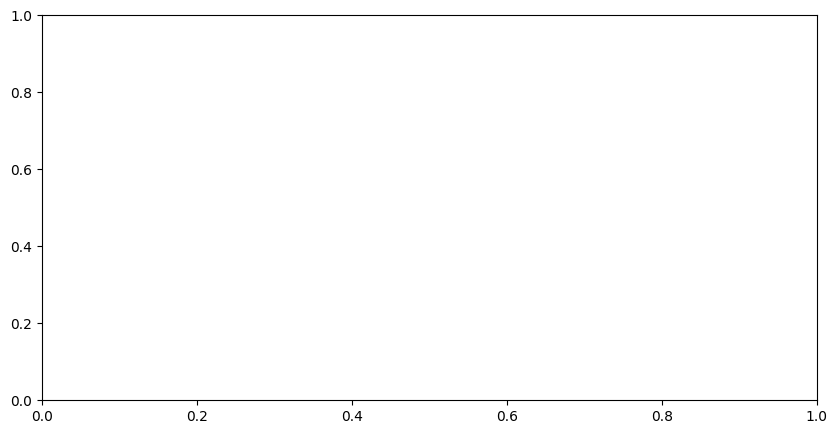

In [5]:
# prepare barplot
fig, ax = plt.subplots(figsize=(10, 5))

# plot
counts_share.reindex(order).plot(kind='barh', ax=ax, stacked=True, cmap='cividis')
ax.set_title('\nAccident Severity by Daytime\n', fontsize=14, fontweight='bold')
ax.set(xlabel='Percentage', ylabel='')
ax.legend(bbox_to_anchor=(1.25, 0.98), frameon=False)

# remove all spines
sns.despine(top=True, right=True, left=True, bottom=True);

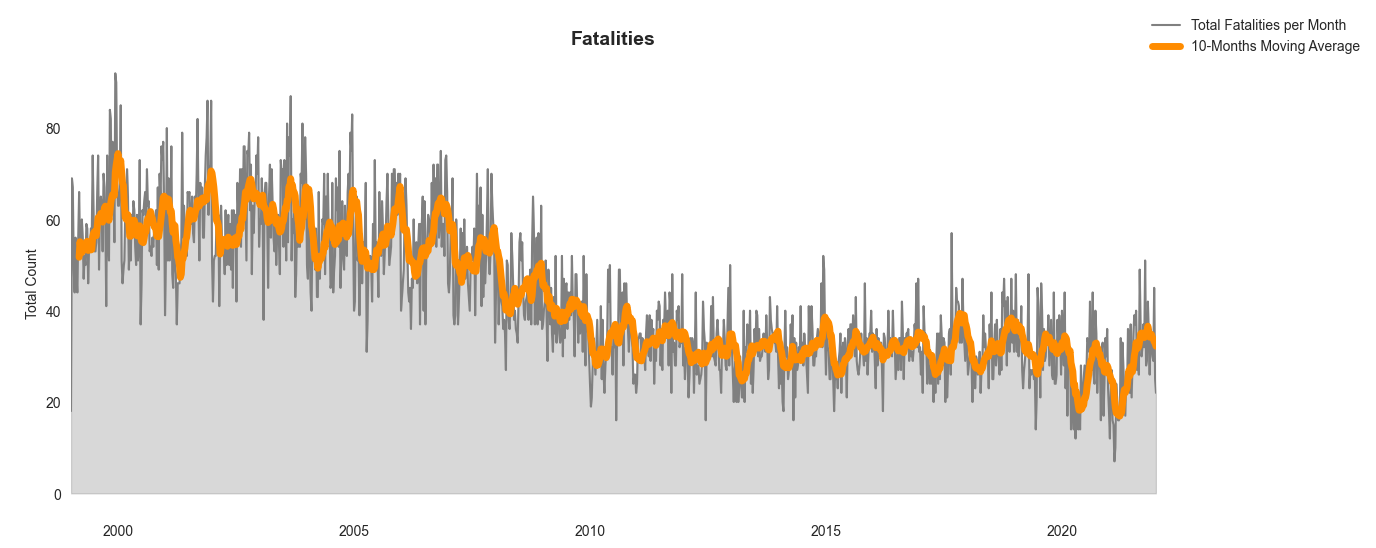

In [38]:
# set the criterium to slice the fatalaties
criteria = df['accident_severity']==1
# create a new dataframe
weekly_fatalities = df.loc[criteria].set_index('date').sort_index().resample('W').size()

# prepare plot
sns.set_style('white')
fig, ax = plt.subplots(figsize=(14,6))

# plot
weekly_fatalities.plot(label='Total Fatalities per Month', color='grey', ax=ax)
plt.fill_between(x=weekly_fatalities.index, y1=weekly_fatalities.values, color='grey', alpha=0.3)
weekly_fatalities.rolling(window=10).mean()\
                           .plot(color='darkorange', linewidth=5, label='10-Months Moving Average', ax=ax)

ax.set_title('\nFatalities', fontsize=14, fontweight='bold')
ax.set(ylabel='\nTotal Count', xlabel='')
ax.legend(bbox_to_anchor=(1.2, 1.1), frameon=False)

# remove all spines
sns.despine(ax=ax, top=True, right=True, left=True, bottom=True);